In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Mall_Customers 2.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# select 2 columns x and y for graph
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


You can split data using train_test_split

<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

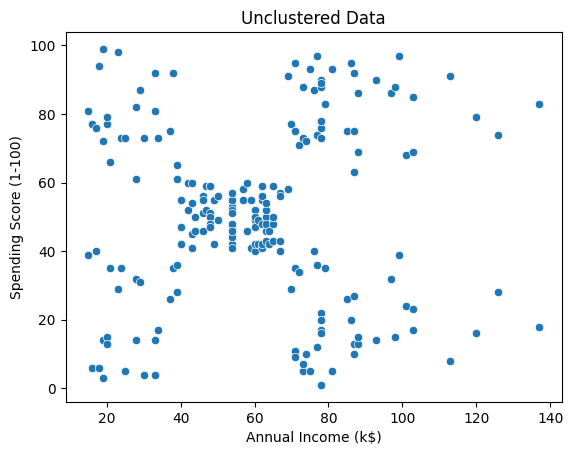

In [5]:
plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering

AgglomerativeClustering is hierarchical Clustering

In [9]:
km = KMeans(n_clusters=3)

In [10]:
km.fit_predict(x)
# customers are clustered into 3 clusters 0 ,1,2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
#sse
km.inertia_

73679.78903948834

In [ ]:
# calculate sse for 15 clusters
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [ ]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30241.343617936585,
 25062.433792653785,
 21850.165282585636,
 19740.010370359305,
 18248.58456228341,
 15845.619372815674,
 14292.543823365124,
 13374.273322189787,
 12087.99592074592]

Elbow Method

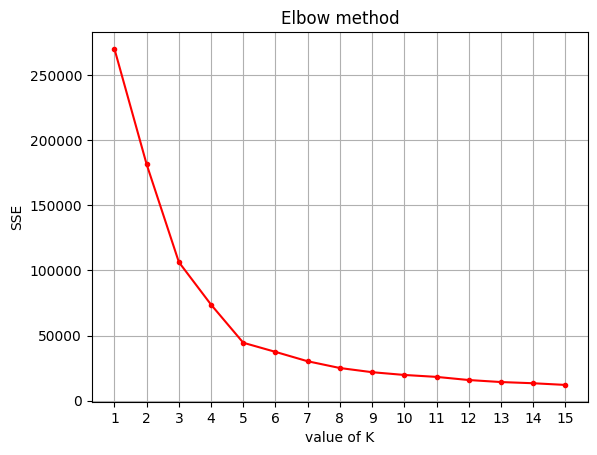

In [14]:
sse=[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30241.343617936585,
 25062.433792653785,
 21850.165282585636,
 19740.010370359305,
 18248.58456228341,
 15845.619372815674,
 14292.543823365124,
 13374.273322189787,
 12087.99592074592]
plt.title("Elbow method")
plt.xlabel('value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse ,marker='.' ,color ='red')


So at 5th cluster

In [16]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score

In [17]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [18]:
silh

[0.2846326569755346,
 0.46761358158775435,
 0.41508307009338524,
 0.47520303221616106,
 0.5379675585622219,
 0.45424552720847033,
 0.45407359550241166,
 0.43674947511456835,
 0.4290473996103517,
 0.4506640486267676,
 0.39939990560567035,
 0.40638915301363027,
 0.41750069246315535,
 0.42410765629723024]

Text(0, 0.5, 'silh')

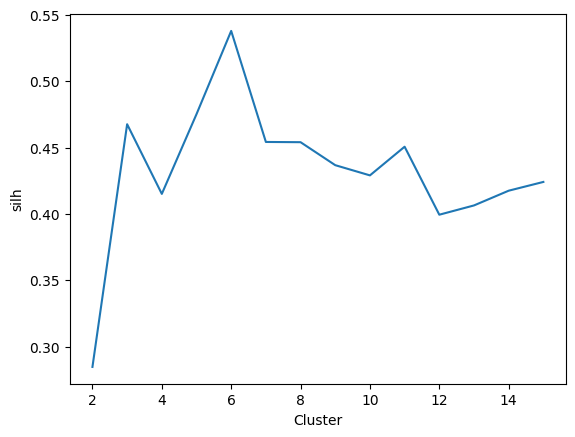

In [23]:
silh=[0.2846326569755346,
 0.46761358158775435,
 0.41508307009338524,
 0.47520303221616106,
 0.5379675585622219,
 0.45424552720847033,
 0.45407359550241166,
 0.43674947511456835,
 0.4290473996103517,
 0.4506640486267676,
 0.39939990560567035,
 0.40638915301363027,
 0.41750069246315535,
 0.42410765629723024]
#  range is from 2 as min 2 clusters required for silhouette as it takes nearest another cluster
sns.lineplot( x=range(2,16), y=silh)
plt.xlabel('Cluster')
plt.ylabel('silh')

same at 5th cluster we are getting highest silhouette_score,<br>
this is efficient cluster

<BarContainer object of 14 artists>

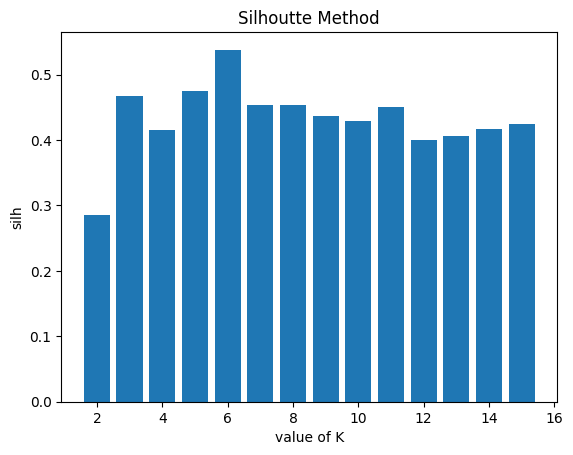

In [28]:
plt.title("Silhoutte Method")
plt.xlabel('value of K')
plt.ylabel('silh')
plt.bar(range(2,16),silh)

In [35]:
km = KMeans(n_clusters=5,random_state=1)

In [36]:
labels = km.fit_predict(x)

In [37]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [43]:
centers = km.cluster_centers_

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

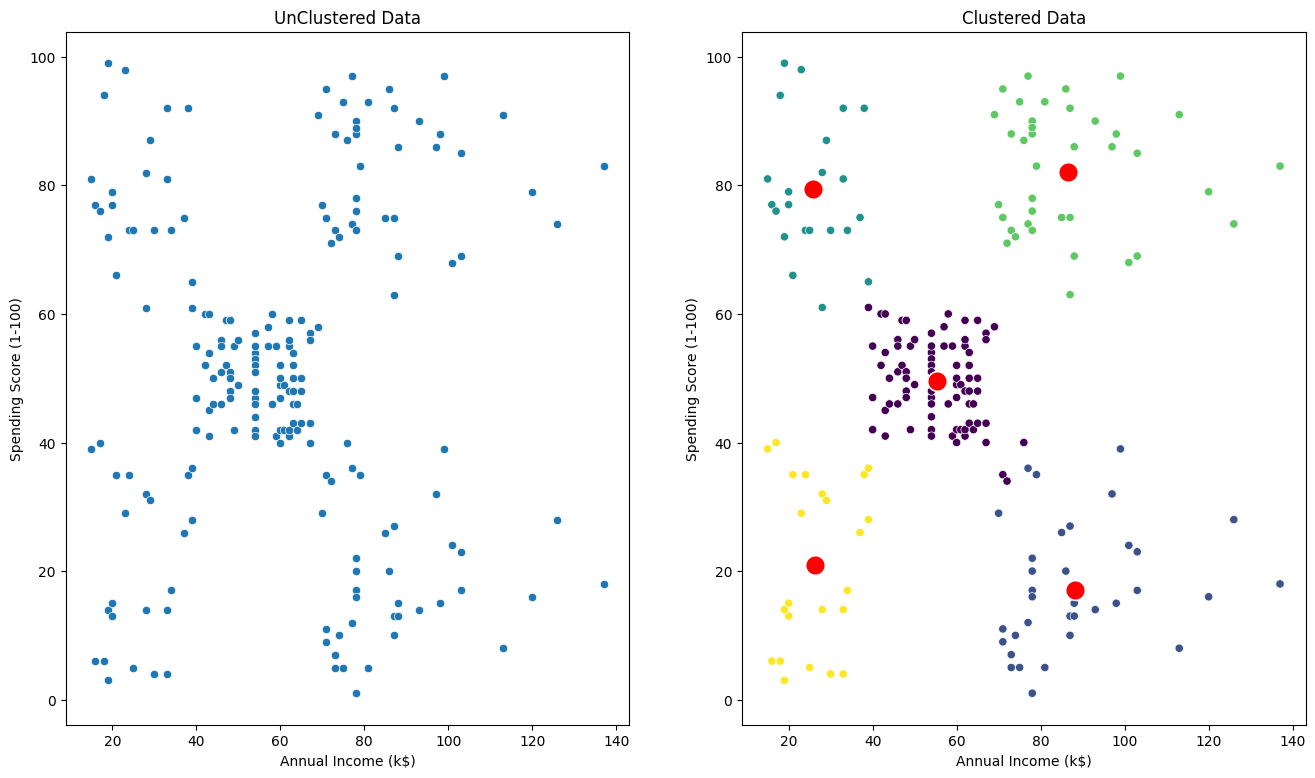

In [47]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('UnClustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels)
sns.scatterplot(x=centers[:,0], y=centers[:,1], s=200, color='red')

In [56]:
# customers in cluster with label 0
df[labels==0].count()
# most profitable customers are clusterd in cluter 0

,0
CustomerID,81
Genre,81
Age,81
Annual Income (k$),81
Spending Score (1-100),81


In [58]:
km.predict([[50,76]])
# this customer will be in 2nd cluster

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [57]:
agl = AgglomerativeClustering(n_clusters=5)

In [59]:
alabels = agl.fit_predict(x)

In [60]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<Axes: title={'center': 'Agglomerative'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

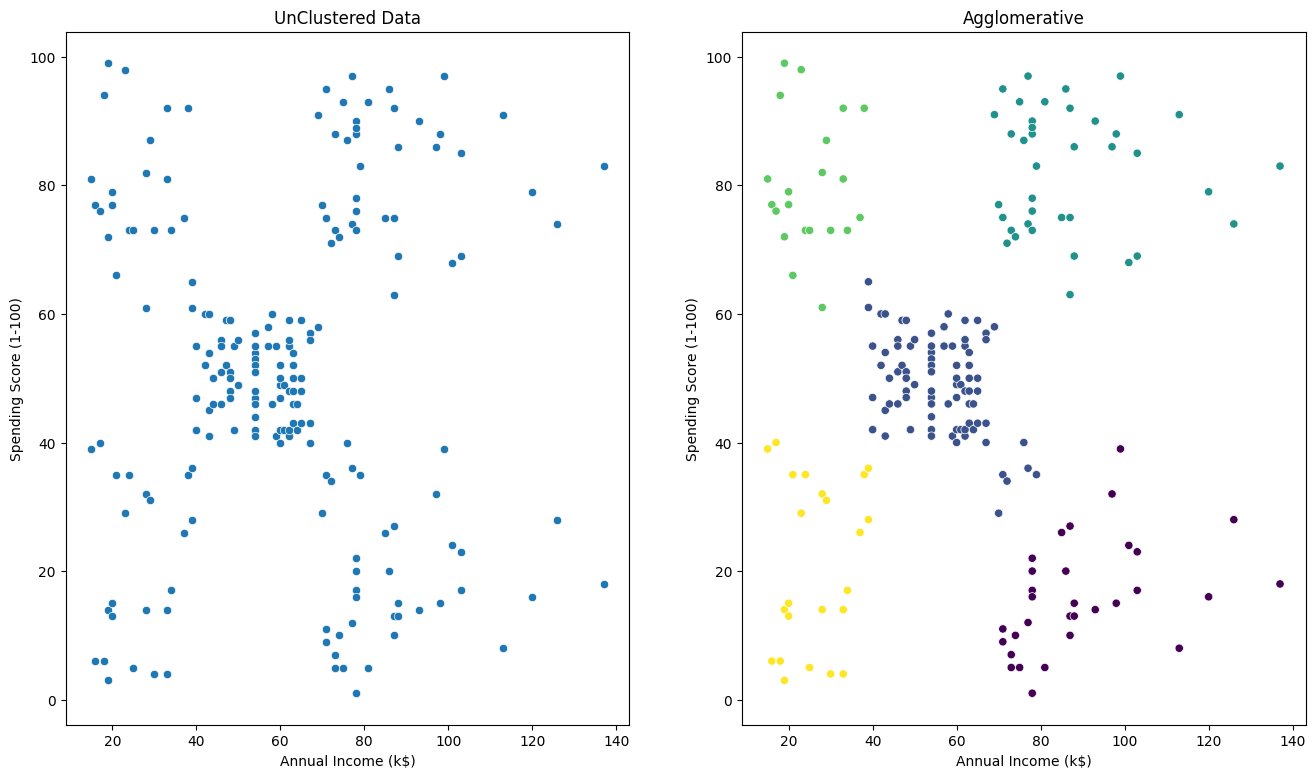

In [64]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('UnClustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Agglomerative')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

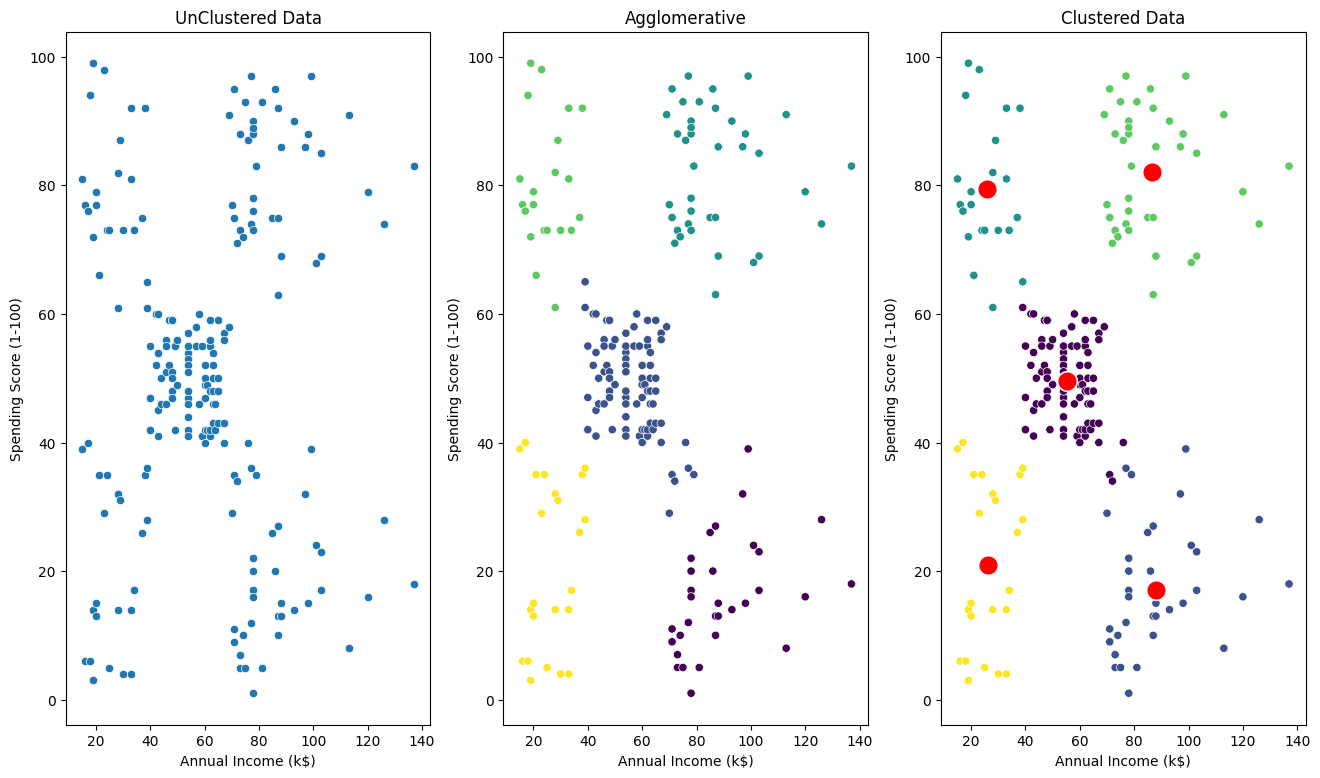

In [63]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.title('UnClustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

plt.subplot(1,3,2)
plt.title('Agglomerative')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,3,3)
plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels)
sns.scatterplot(x=centers[:,0], y=centers[:,1], s=200, color='red')